In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import lec7_graphs as gfx
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')

In [3]:
import factor_analyzer as factor
#from factor_analyzer import FactorAnalyzer
import missingno as msngo
df = pd.read_csv('cep45.csv')

In [4]:
df.columns

Index(['corr', 'filtro', 'psu', 'region', 'p1_1', 'p1_2', 'p1_3', 'p2', 'p3',
       'p4',
       ...
       'de14_b', 'de14_c', 'de14_d', 'de14_e', 'de14_f', 'de15', 'de16',
       'de17', 'b5', 'pond'],
      dtype='object', length=188)

In [5]:
trust_df = df.filter(regex='p17_*')

In [6]:
trust_df.sample()

,p17_a,p17_b,p17_c,p17_d,p17_e,p17_f,p17_g,p17_h,p17_i,p17_j,p17_k,p17_l,p17_m,p17_n
542,3,4,2,3,2,3,2,2,2,3,3,3,4,2


In [7]:
trust_df = trust_df.rename(columns={'p17_a': 'I.Catolica', 'p17_b': 'I.Evangelica', 'p17_c': 'FFAA', 'p17_d':
'Justicia',
'p17_e': 'Prensa', 'p17_f': 'Television', 'p17_g':'Sindicatos', 'p17_h':'Carabineros',
'p17_i': 'Gobierno', 'p17_j': 'PartidosPol', 'p17_k': 'Congreso', 'p17_l':'Empresas',
'p17_m':'Universidades', 'p17_n':'Radio'})

In [10]:
def fetch_missing(df, missing_vals):
    for colname, serie in df.iteritems():
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))
fetch_missing(trust_df, missing_vals=[8, 9])

I.Catolica 0.03
I.Evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
Television 0.02
Sindicatos 0.09
Carabineros 0.02
Gobierno 0.03
PartidosPol 0.03
Congreso 0.05
Empresas 0.04
Universidades 0.07
Radio 0.03


<Figure size 288x288 with 0 Axes>

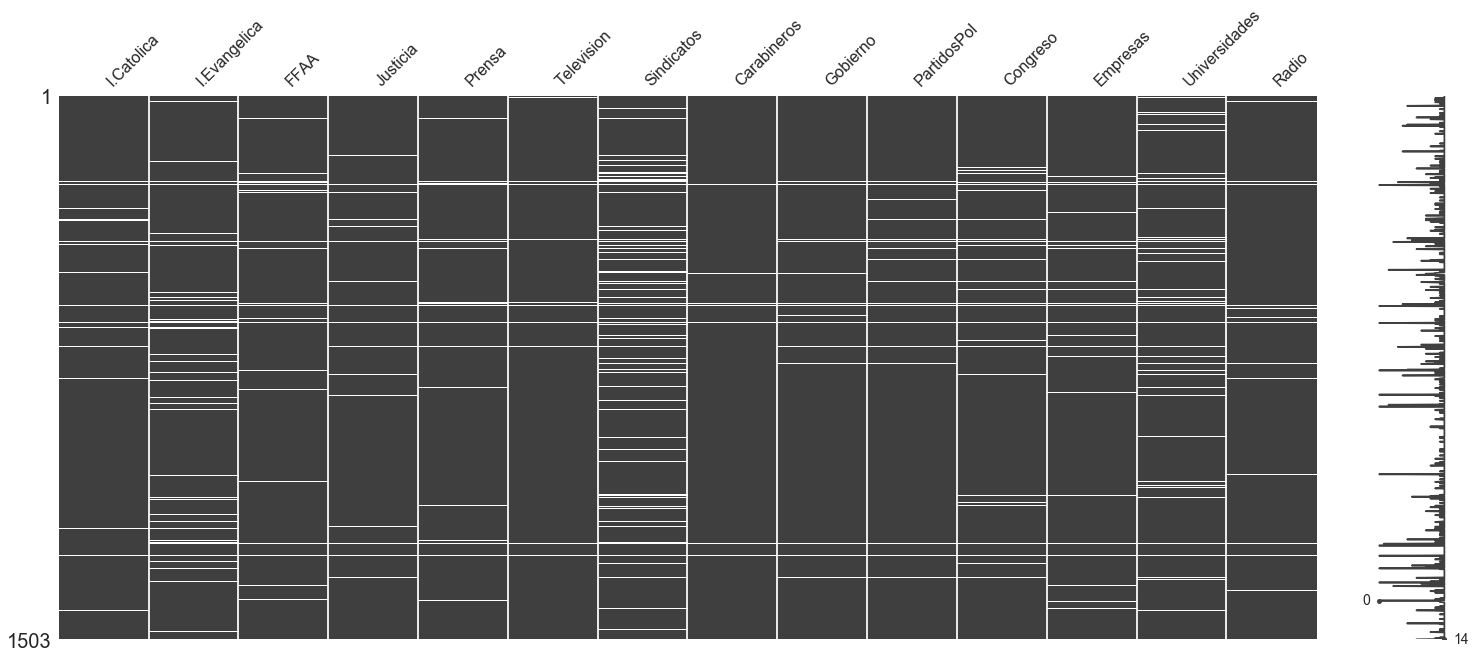

In [11]:
plt.figure(figsize=(4,4))
msngo.matrix(trust_df.replace([8, 9], [np.nan, np.nan]));

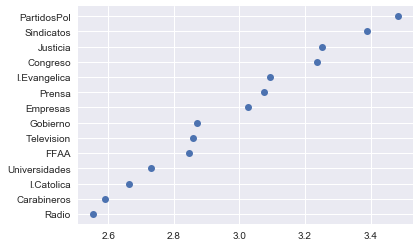

In [14]:
# Generamos dos arrays vacíos para guardar el nombre de la variable y la media
variable = []
mean = []
# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in trust_df.iteritems():
    # guardamos el nombre en variable
    variable.append(colname)
    # calculamos y procesamos la media
    mean.append(serie.mean())
df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df['mean'], df['var'],'o')

In [16]:
import factor_analyzer as fact
fact.calculate_bartlett_sphericity(trust_df)

(6630.891612219014, 0.0)

In [37]:
fact.calculate_kmo(trust_df)# importancia relativa >.7 factor latente, kmo referencia de la importancia especifica de cada variable, el 2 es al kmo global, reportar el kmo global es improtante, por lo menos hay 1 factor latente que es importante (al tener kmo > .7)

(                    KMO
 I.Catolica     0.938611
 I.Evangelica   0.927266
 FFAA           0.931852
 Justicia       0.952914
 Prensa         0.919814
 Television     0.885661
 Sindicatos     0.936799
 Carabineros    0.911312
 Gobierno       0.939891
 PartidosPol    0.913019
 Congreso       0.919379
 Empresas       0.942421
 Universidades  0.951845
 Radio          0.932296, 0.9275552166414559)

In [38]:
factorize = factor.FactorAnalyzer()
factorize.analyze(trust_df, n_factors = 2, method = 'varimax')

In [39]:
factor_eigenvalues = factorize.get_eigenvalues()[0]

In [40]:
factor_eigenvalues

,Original_Eigenvalues
0,5.498424
1,1.145873
2,0.899263
3,0.855508
4,0.721651
5,0.695720
6,0.633895
7,0.623964
8,0.606091
9,0.570587


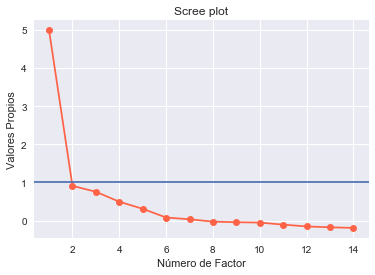

In [41]:
plt.plot(factor_eigenvalues.index + 1, factor_screeplot.values, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot");

In [43]:
factorize.loadings.applymap(lambda x: np.where(x < .4,' ', round(x,2)))

,Factor1,Factor2
I.Catolica,,0.53
I.Evangelica,,
FFAA,,
Justicia,0.45,
Prensa,,0.45
Television,,0.83
Sindicatos,0.59,
Carabineros,,0.63
Gobierno,0.42,
PartidosPol,0.74,


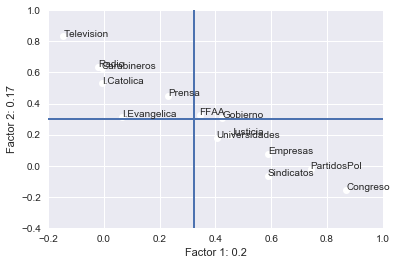

In [48]:
factor_loadings = factorize.loadings

# cruzamos ambos factores
plt.plot(factor_loadings.Factor1, factor_loadings.Factor2,'o',color='white')
plt.xlim((-.2,1)) # definimos límites
plt.ylim((-.4, 1))
# Para cada elemento en los factores
for i, txt in enumerate(factor_loadings.index):
    # anotemos el nombre de la variable
    plt.annotate(txt, (factor_loadings['Factor1'][i],
    factor_loadings['Factor2'][i]))
    # Grafiquemos la media de ambos factores
    plt.axvline(factor_loadings['Factor1'].mean())
    plt.axhline(factor_loadings['Factor2'].mean())
    # Reportemos la varianza de cada dimensión
    plt.xlabel('Factor 1: {}'.format(round(factor_var['Factor1'][1], 2)))
    plt.ylabel('Factor 2: {}'.format(round(factor_var['Factor2'][1], 2)))

In [50]:
factor_var = factorize.get_factor_variance()
factor_var

,Factor1,Factor2
SS Loadings,2.740167,2.386112
Proportion Var,0.195726,0.170437
Cumulative Var,0.195726,0.366163


In [51]:
extract_factor_scores = factorize.get_scores(trust_df)

In [52]:
extract_factor_scores

,Factor1,Factor2
0,-0.477841,0.031113
1,-0.047859,-0.028650
2,0.668964,0.608992
3,-0.134620,-0.370780
4,-1.120615,-0.992430
...,...,...
1498,0.842018,1.246097
1499,-0.191467,0.349238
1500,-0.151731,0.030319
1501,-0.054305,-0.059881


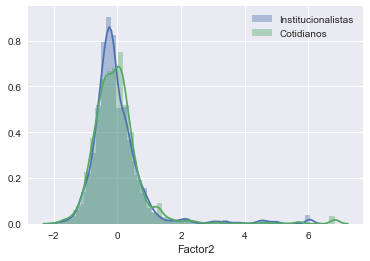

In [53]:
sns.distplot(extract_factor_scores.loc[:, 'Factor1'], label="Institucionalistas")
sns.distplot(extract_factor_scores.loc[:, 'Factor2'], label="Cotidianos")
plt.legend()